# previous years

this may or may not be used give if we have any time
goal of this is to process previous years work for 2020-2021
## datasets
working on assignment 3 repos from 2020 and 2021 for softeng206, links should be pinned somewhere in our discord or shared on the google drive
## configuration
due to the fact that some detectors only work with the data that we have the config has been changed to this, see [default config for diff](../config/config.json)
```json

  "detectors": {
    "DiffMatchesMessageDetect": {
      "enabled": true,
      "weight": 1
    },
    "ShortCommitMessageDetect": {
      "enabled": true,
      "weight": 1
    },
    "DiffDistanceCalculation": {
      "enabled": true,
      "weight": 1
    },
    "BranchNameConsistencyDetect": {
      "enabled": true,
      "weight": 1
    },
    "CrissCrossMergeDetect": {
      "enabled": true,
      "weight": 1
    },
    "UnresolvedDetect": {
      "enabled": true,
      "weight": 1
    },
    "EmptyCommitDetect": {
      "enabled": true,
      "weight": 1
    },
    "BinaryDetect": {
      "enabled": true,
      "weight": 1
    }
  }
}
```
save this as an `offline.json` config or use the below branch

i had to make quite a few changes to get git-gopher working with offline only because we don't have access at all to their github remotes and i didn't want any of this merged. so for the moment all the code lives on [notebooks/plot](https://github.com/Git-Gopher/go-gopher/tree/notebooks/plot)


get data with (use absolute dirs if debugging)
```bash
./bin/go-gopher-cli analyze --logging --config ~/Projects/go-gopher/config/offline.json batch --offline /home/wqsz7xn/Desktop/data/assignment-3-and-project-2020
```

## limitations
- don't have access to issue tracker, pull request and the rest of the remote data. this means that some (a lot) of the detectors that we have written have been disabled
- limited attribution to violation/suggestion author due to no usernames from remotes
- due to the above we think that the general **quality** of the data will be poor

In [9]:
import glob
import json
from collections import Counter
from pprint import pprint

import matplotlib.pyplot as plt
import pandas


# after running command you should have a directory of json files, that we need to merge into a single object
def merge(path: str):
    combined = []
    for json_file in glob.glob(
        "%s*.json" % path
    ):  # Assuming that your json files and .py file in the same directory
        with open(json_file, "rb") as infile:
            combined.append(json.load(infile))
    return combined


def save(obj, path):
    with open(path, "w") as f:
        json.dump(data, f)


json_path = "/home/wqsz7xn/Projects/go-gopher/output2/"
save_path = "/home/wqsz7xn/Projects/go-gopher/2020.json"

data = merge(json_path)
save(data, save_path)

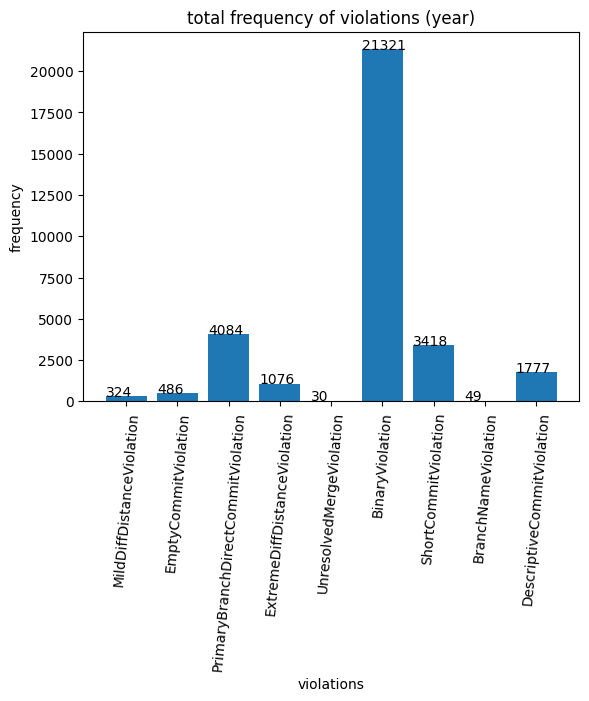

In [7]:
plt.title("total frequency of violations (year)")
plt.xlabel("violations")
plt.ylabel("frequency")
plt.xticks(rotation=85)


def bar(data):
    violations = []
    for x in data:
        for v in x["violations"]:
            violations.append(v["Name"])
        # plt.plot(ds[k], vs[k], label = k)
    xs = list(set(violations))
    ys = []
    for x in xs:
        ys.append(len(list(filter(lambda ys: ys == x, violations))))

    bars = plt.bar(xs, ys)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval + 0.005, yval)


bar(data)